In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#print("Environment ok")
df = pd.read_csv("../data/sales.csv")
df.head()

,order_id,order_date,customer_id,product_id,category,quantity,unit_price,discount,city
0,1,2024-01-05,101,2001,Electronics,1,500,0.10,Paris
1,2,2024-01-10,102,2003,Clothing,3,40,0.00,Lyon
2,3,2024-02-02,101,2002,Electronics,1,300,0.05,Paris
3,4,2024-02-15,103,2004,Home,2,120,0.20,Marseille
4,5,2024-03-01,104,2005,Clothing,1,60,0.00,Lille


### Nettoyage + features

In [2]:
df.isnull().sum() #voir les valeurs manquantes
df.drop_duplicates() #supprimer les doublons
#types
df["order_date"] = pd.to_datetime(df["order_date"])
df["quantity"] = df["quantity"].astype(int)
#df["revenue"] = df["quantity"] * df["unit_price"] * (1 - df["discount"])

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     5 non-null      int64         
 1   order_date   5 non-null      datetime64[ns]
 2   customer_id  5 non-null      int64         
 3   product_id   5 non-null      int64         
 4   category     5 non-null      object        
 5   quantity     5 non-null      int64         
 6   unit_price   5 non-null      int64         
 7   discount     5 non-null      float64       
 8   city         5 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 492.0+ bytes


,order_id,order_date,customer_id,product_id,quantity,unit_price,discount
count,5.000000,5,5.00000,5.000000,5.000000,5.00000,5.000000
mean,3.000000,2024-01-31 00:00:00,102.20000,2003.000000,1.600000,204.00000,0.070000
min,1.000000,2024-01-05 00:00:00,101.00000,2001.000000,1.000000,40.00000,0.000000
25%,2.000000,2024-01-10 00:00:00,101.00000,2002.000000,1.000000,60.00000,0.000000
50%,3.000000,2024-02-02 00:00:00,102.00000,2003.000000,1.000000,120.00000,0.050000
75%,4.000000,2024-02-15 00:00:00,103.00000,2004.000000,2.000000,300.00000,0.100000
max,5.000000,2024-03-01 00:00:00,104.00000,2005.000000,3.000000,500.00000,0.200000
std,1.581139,NaN,1.30384,1.581139,0.894427,194.62785,0.083666


### Feature engineering

In [3]:
#features business
df["revenue"] = df["quantity"] * df["unit_price"]
df["revenue_after_discount"] = df["revenue"] * (1 - df["discount"])

df["order_date"] = pd.to_datetime(df["order_date"])
df["month"] = df["order_date"].dt.month
df["year"] = df["order_date"].dt.year

df["is_discounted"] = df["discount"] > 0

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5 non-null      int64         
 1   order_date              5 non-null      datetime64[ns]
 2   customer_id             5 non-null      int64         
 3   product_id              5 non-null      int64         
 4   category                5 non-null      object        
 5   quantity                5 non-null      int64         
 6   unit_price              5 non-null      int64         
 7   discount                5 non-null      float64       
 8   city                    5 non-null      object        
 9   revenue                 5 non-null      int64         
 10  revenue_after_discount  5 non-null      float64       
 11  month                   5 non-null      int32         
 12  year                    5 non-null      int32         

,order_id,order_date,customer_id,product_id,quantity,unit_price,discount,revenue,revenue_after_discount,month,year
count,5.000000,5,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.0
mean,3.000000,2024-01-31 00:00:00,102.20000,2003.000000,1.600000,204.00000,0.070000,244.000000,221.400000,1.80000,2024.0
min,1.000000,2024-01-05 00:00:00,101.00000,2001.000000,1.000000,40.00000,0.000000,60.000000,60.000000,1.00000,2024.0
25%,2.000000,2024-01-10 00:00:00,101.00000,2002.000000,1.000000,60.00000,0.000000,120.000000,120.000000,1.00000,2024.0
50%,3.000000,2024-02-02 00:00:00,102.00000,2003.000000,1.000000,120.00000,0.050000,240.000000,192.000000,2.00000,2024.0
75%,4.000000,2024-02-15 00:00:00,103.00000,2004.000000,2.000000,300.00000,0.100000,300.000000,285.000000,2.00000,2024.0
max,5.000000,2024-03-01 00:00:00,104.00000,2005.000000,3.000000,500.00000,0.200000,500.000000,450.000000,3.00000,2024.0
std,1.581139,NaN,1.30384,1.581139,0.894427,194.62785,0.083666,171.697408,152.888194,0.83666,0.0


### J’ai commencé par une analyse descriptive pour valider la cohérence des données avant
d’explorer les performances par catégorie et par ville.”

### kpi principaux

In [4]:
total_revenue = df["revenue"].sum()
total_revenue_net = df["revenue_after_discount"].sum()
avg_discount = df["discount"].mean()

(total_revenue, total_revenue_net, avg_discount)

(np.int64(1220), np.float64(1107.0), np.float64(0.07))

### Ventes par catégorie (insight direct)

In [5]:
df.groupby("category")["revenue_after_discount"].sum().sort_values(ascending=False)

category
Electronics    735.0
Home           192.0
Clothing       180.0
Name: revenue_after_discount, dtype: float64

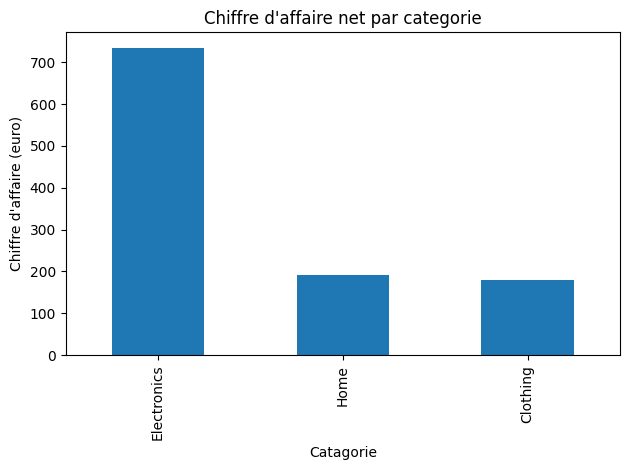

In [8]:
#donnee pour le graphe
category_sales = (
    df.groupby("category")["revenue_after_discount"]
      .sum()
      .sort_values(ascending=False)
)

#creation du graphique
plt.figure()
category_sales.plot(kind="bar")
plt.title("Revenue par categorie")
plt.xlabel("Catagory")
plt.ylabel("Revenue (euro)")
plt.tight_layout()

#sauvegarde 
plt.savefig("../reports/revenue_by_category.png")
plt.show()

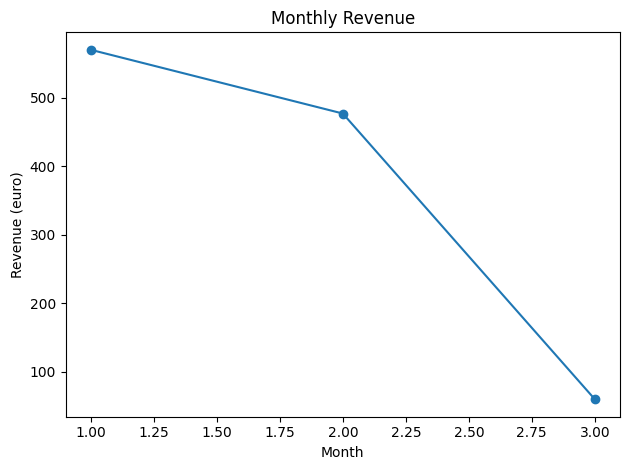

In [9]:
#creation du graphique
plt.figure()
df.groupby(df["order_date"].dt.month)["revenue_after_discount"].sum().plot(marker="o")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue (euro)")
plt.tight_layout()

#sauvegarde 
plt.savefig("../reports/Monthly Revenue.png")
plt.show()

### chiffre d'affaire par ville

In [10]:
city_revenue = df.groupby("city")["revenue_after_discount"].sum().sort_values(ascending=False)
city_revenue

city
Paris        735.0
Marseille    192.0
Lyon         120.0
Lille         60.0
Name: revenue_after_discount, dtype: float64

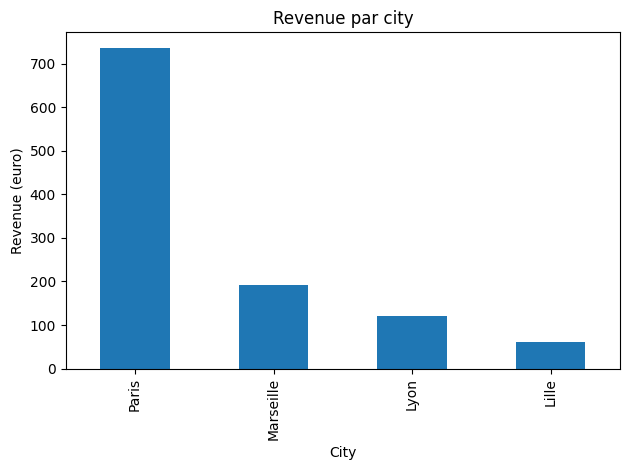

In [11]:
#creation du graphique
plt.figure()
city_revenue.plot(kind="bar")
plt.title("Revenue par city")
plt.xlabel("City")
plt.ylabel("Revenue (euro)")
plt.tight_layout()

#sauvegarde 
plt.savefig("../reports/Revenue_par_city.png")
plt.show()

### Remise moyenne par ville

In [12]:
df.groupby("city")["discount"].mean().sort_values(ascending=False)

city
Marseille    0.200
Paris        0.075
Lyon         0.000
Lille        0.000
Name: discount, dtype: float64

### Insight – City performance
Paris génère le chiffre d’affaires le plus élevé, 
tandis que certaines villes présentent des revenus plus faibles malgré des niveaux de remise similaires.

### Insight – Discount by city
Les remises moyennes varient peu selon les villes, suggérant que la performance est davantage liée au volume des ventes qu’aux promotions.